<a href="https://colab.research.google.com/github/allisson2156/AnaliseMusicasSpotify2023/blob/main/songsSpotify2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importação de bibliotecas
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# leitura do arquivo

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")

Number of column :24
Number of rows :953


In [4]:
# manuseio do dados e informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [6]:
categorical_columns = ['track_name', 'artist(s)_name', 'key', 'mode']
for coluna in df.columns:
    if coluna not in categorical_columns and coluna not in ['streams']:
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

In [7]:
nan_values = df.isna()
print(nan_values)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0         False           False         False          False           False   
1         False           False         False          False           False   
2         False           False         False          False           False   
3         False           False         False          False           False   
4         False           False         False          False           False   
..          ...             ...           ...            ...             ...   
948       False           False         False          False           False   
949       False           False         False          False           False   
950       False           False         False          False           False   
951       False           False         False          False           False   
952       False           False         False          False           False   

     released_day  in_spotify_playlists

In [36]:
df.fillna(0, inplace=True)

In [9]:
df.duplicated().sum()

0

In [37]:
# inicio da análise
print(f"number of artists '{df['artist(s)_name'].nunique()}'")

number of artists '645'


In [35]:
artist_counts.head(20)

artist(s)_name
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
BTS                  8
Feid                 8
Drake, 21 Savage     8
Labrinth             7
Olivia Rodrigo       7
NewJeans             6
Doja Cat             6
Billie Eilish        5
Drake                4
IVE                  4
Arctic Monkeys       4
Karol G              4
Name: count, dtype: int64

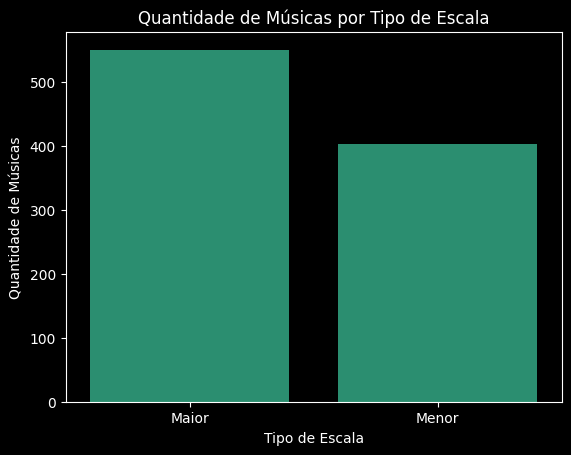

In [18]:
plt.style.use('dark_background')
sns.set_palette("Dark2")
sns.countplot(x='mode', data=df)

# Adiciona rótulos e título ao gráfico
plt.xlabel('Tipo de Escala')
plt.ylabel('Quantidade de Músicas')
plt.title('Quantidade de Músicas por Tipo de Escala')

# Altera os rótulos no eixo x
plt.xticks(ticks=[0, 1], labels=['Maior', 'Menor'])

# Mostra o gráfico
plt.show()

<Axes: xlabel='key', ylabel='acousticness_%'>

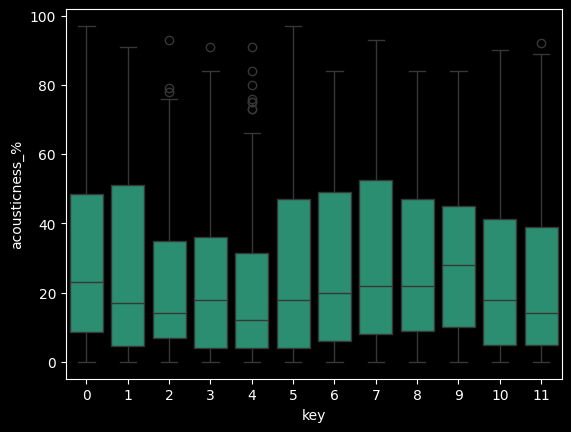

In [19]:
#Distribuição da acústica para cada nota músical
plt.style.use('dark_background')
sns.set_palette("Dark2")
sns.boxplot(x='key', y='acousticness_%', data=df)

<Axes: xlabel='key', ylabel='count'>

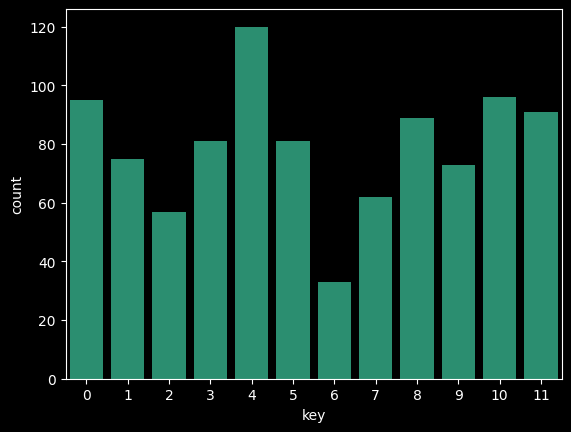

In [20]:
plt.style.use('dark_background')
sns.set_palette("Dark2")
sns.countplot(x='key', data=df)

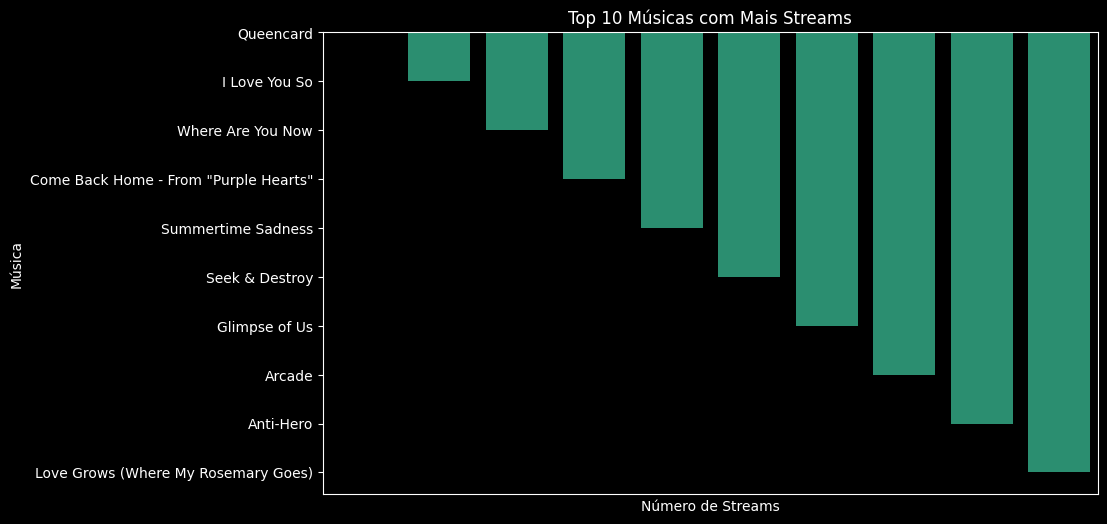

In [41]:
# Selecione as top 10 músicas com mais streams
top_10_streams = df_sorted.head(10)

# Defina a paleta de cores
sns.set_palette("Dark2")

# Crie uma figura com tamanho especificado
plt.figure(figsize=(10, 6))

# Aqui, usamos 'ascending=True' para que as barras sejam exibidas do menor (no topo) para o maior (na base)
ordered_streams = top_10_streams.sort_values(by='streams', ascending=True)
sns.barplot(x=ordered_streams['streams'], y=ordered_streams['track_name'])

# Adicione rótulos e título ao gráfico
plt.style.use('dark_background')
plt.xlabel('Número de Streams')
plt.ylabel('Música')
plt.title('Top 10 Músicas com Mais Streams')

# Remova os x-ticks conforme o código original
plt.xticks([])

# Mostre o gráfico
plt.show()

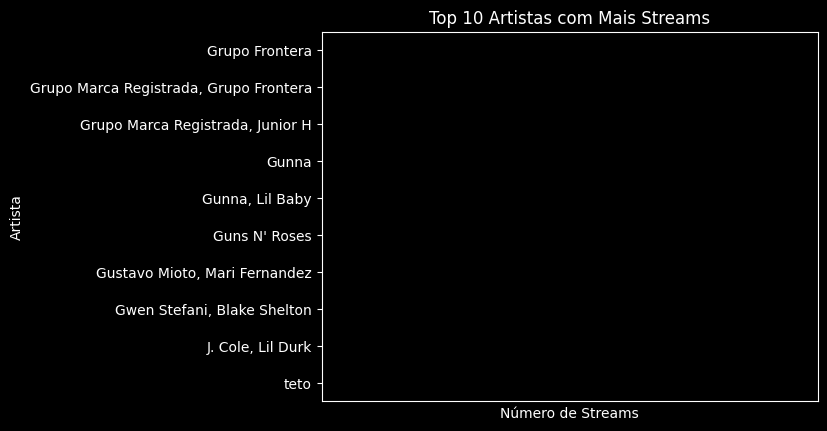

In [38]:
# Converter a coluna 'streams' para tipo numérico
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Agrupar os dados por 'artist(s)_name' e somar os streams para cada artista
artist_streams = df.groupby('artist(s)_name')['streams'].sum()

# Ordenar os dados em ordem crescente
top_artists = artist_streams.sort_values(ascending=True).tail(10)

# Definir a paleta de cores
sns.set_palette("Dark2")

# Criar um gráfico de barras para os 10 artistas com mais streams
sns.barplot(x=top_artists.values, y=top_artists.index)

# Adicionar rótulos e título ao gráfico
plt.style.use('dark_background')
plt.xlabel('Número de Streams')
plt.ylabel('Artista')
plt.title('Top 10 Artistas com Mais Streams')

# Remover os x-ticks
plt.xticks([])

# Mostrar o gráfico
plt.show()


<ipython-input-23-87461a314d12>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='artist', data=top_artists, palette='Greens')


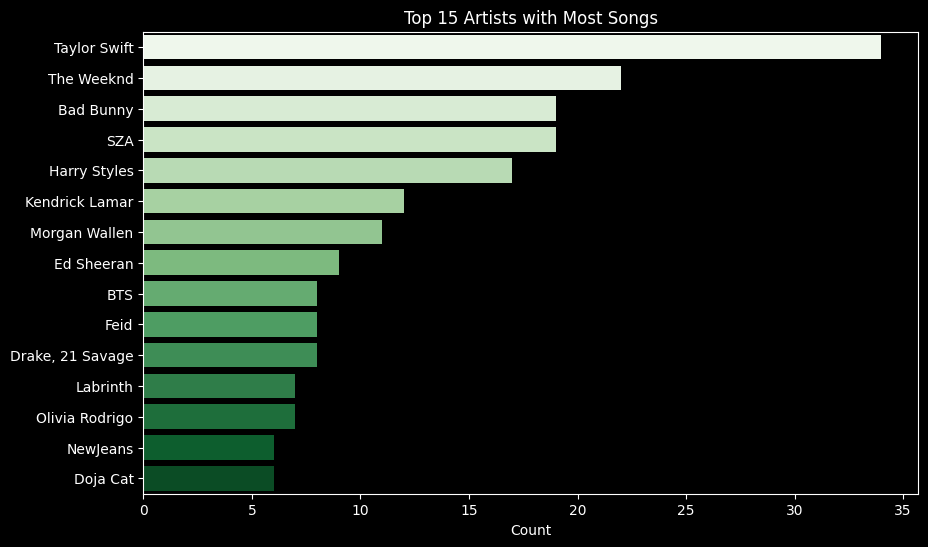

In [23]:
# Conta o número de músicas para cada artista
artist_counts = df['artist(s)_name'].value_counts()


# Seleciona os 15 artistas com mais músicas
top_artists = artist_counts.head(15).reset_index()

# Renomeia as colunas para 'artist' e 'count'
plt.style.use('dark_background')
top_artists.columns = ['artist', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='artist', data=top_artists, palette='Greens')

plt.xlabel('Count')
plt.ylabel('')
plt.title('Top 15 Artists with Most Songs')
plt.show()


In [42]:
df['key'] = pd.Categorical(df['key']).codes
df['mode'] = pd.Categorical(df['mode']).codes

fig_3d_scatter = px.scatter_3d(df, x='energy_%', y='valence_%', z='danceability_%', color='streams',
                               size='streams', hover_name='track_name',
                               title='Energy vs. Valence vs. Danceability')
fig_3d_scatter.show()

In [43]:
iplot(px.bar(artist_counts[:15],
             text_auto = True,
             color = artist_counts[:15].index,
             color_discrete_sequence = colors,
             labels=dict(index="Count Names",value="Count"),
             title = 'Top 15 Artists with Most Songs'
            ))

NameError: name 'iplot' is not defined

In [25]:
songs_by_year = df['released_year'].value_counts().reset_index()
songs_by_year.columns = ['released_year', 'count']

<ipython-input-26-2f8729d9a227>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='released_year', y='count', data=songs_by_year.head(14), palette='Greens')


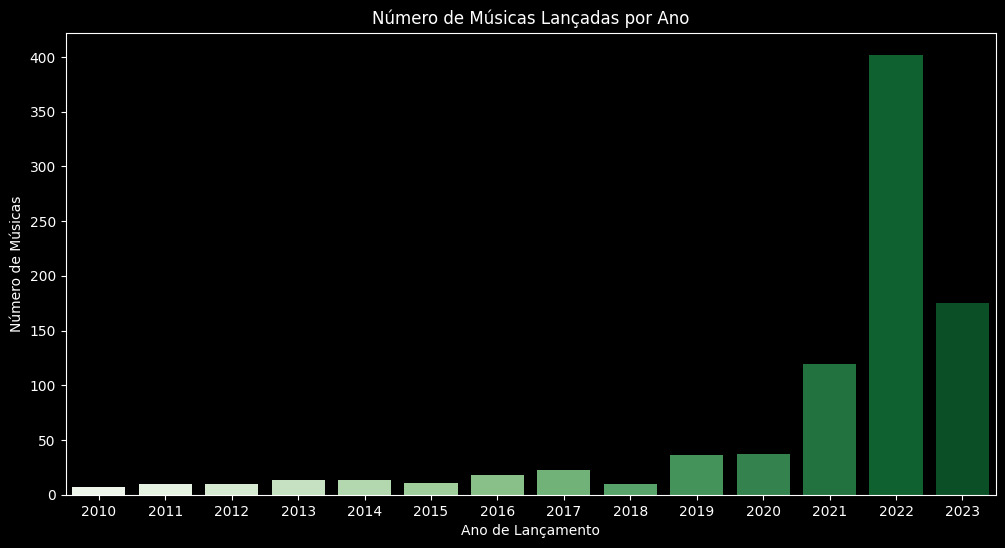

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', data=songs_by_year.head(14), palette='Greens')
plt.title('Número de Músicas Lançadas por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Músicas')
plt.show()

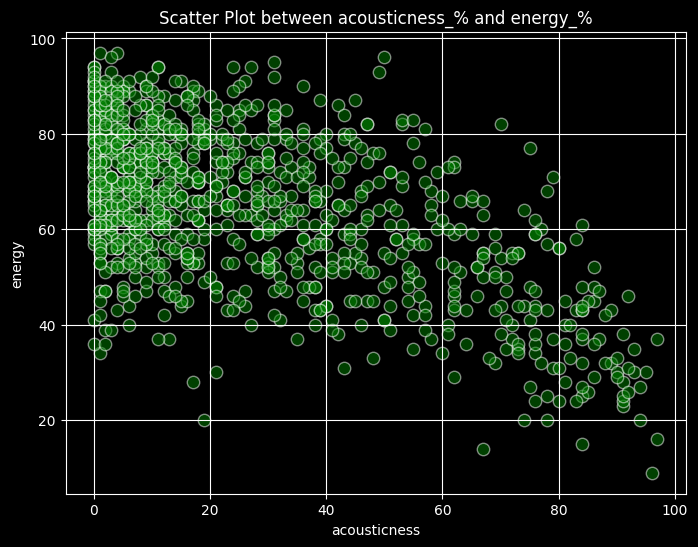

In [27]:
plt.figure(figsize=(8, 6))

plt.scatter(df['acousticness_%'], df['energy_%'], color='green' , alpha=0.5, edgecolors='w', s=80)
plt.title('Scatter Plot between acousticness_% and energy_%')
plt.xlabel('acousticness')
plt.ylabel('energy')
plt.grid(True)
plt.show()

In [45]:
df['streams'] = df['streams'].str.replace(',', '.')  # Substitui vírgulas por pontos
df['streams'] = df['streams'].str.extract('(\d+\.\d+)')  # Extrai apenas números com ponto decimal
df['streams'] = df['streams'].astype(float)  # Converte a coluna para float


AttributeError: Can only use .str accessor with string values!

In [29]:
scaler = MinMaxScaler()

df['streams'] = scaler.fit_transform(df[['streams']])
print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts  streams  in_apple_playlists  ...  bpm  key  mode  \
0                147      NaN                  4

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


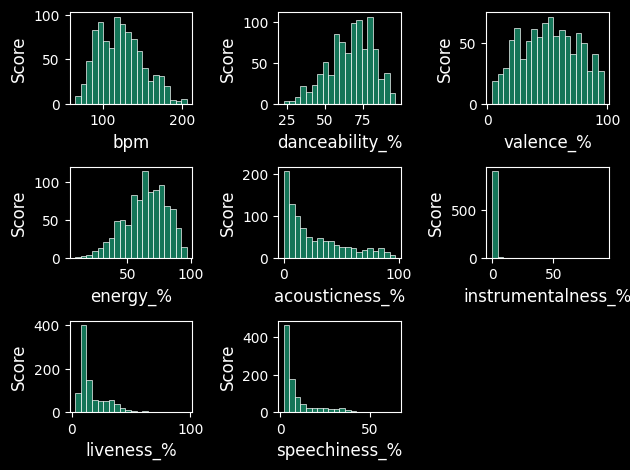

In [32]:

columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.set_palette("Dark2")
    sns.histplot(data=df, x=column, bins=20)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

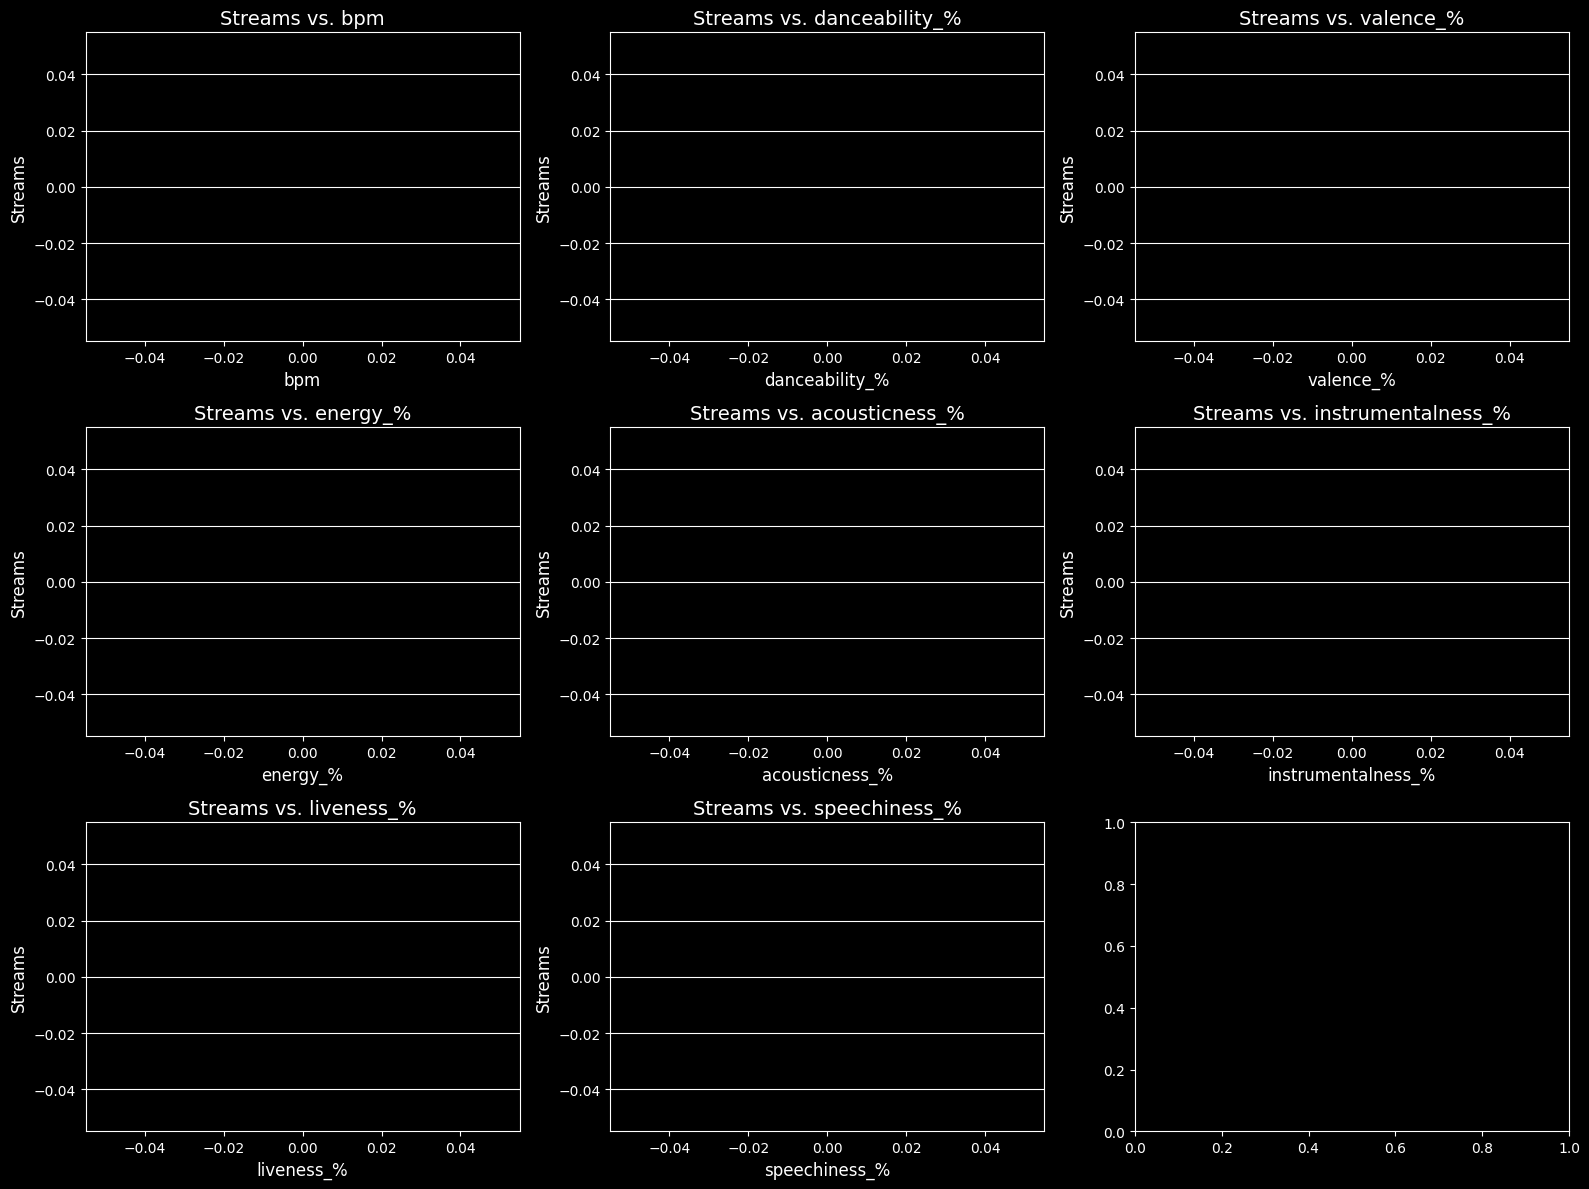

In [33]:
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df[column], df['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

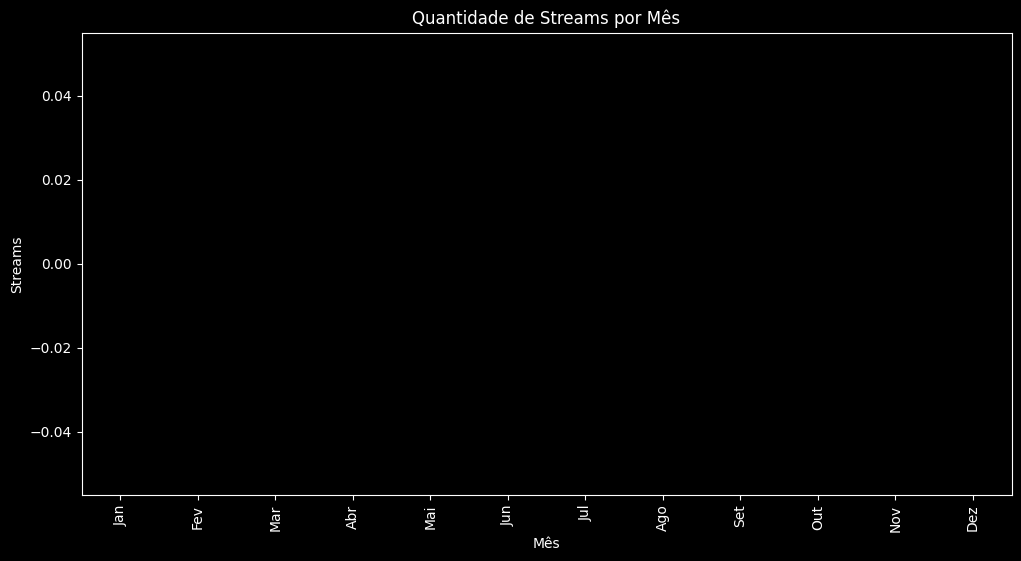

In [34]:
# Convertendo a coluna 'streams' para numérico, ignorando erros para valores não numéricos
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Agrupando os dados por 'released_month' e somando os streams
monthly_streams = df.groupby('released_month')['streams'].sum()

# Plotando os dados
plt.figure(figsize=(12, 6))
monthly_streams.plot(kind='bar')
plt.title('Quantidade de Streams por Mês')
plt.xlabel('Mês')
plt.ylabel('Streams')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

In [47]:
# Sunburst Chart: Spotify Playlist and Chart Distribution
fig_sunburst = px.sunburst(df, path=['in_spotify_playlists', 'in_spotify_charts'], values='streams',
                           title='Spotify Playlist and Chart Distribution')
fig_sunburst.show()

colormap = plt.cm.get_cmap('viridis')

<ipython-input-47-912892ae5008>:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [48]:
# Parallel Coordinates Plot: Audio Features
fig_parallel = px.parallel_coordinates(df, dimensions=['danceability_%', 'valence_%', 'energy_%',
                                                      'acousticness_%', 'instrumentalness_%', 'liveness_%'],
                                     color='in_spotify_charts',
                                     title='Audio Features Comparison')
fig_parallel.show()

colormap = plt.cm.get_cmap('viridis')

<ipython-input-48-d68b3b6073c8>:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

